In [113]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
rlc = pd.read_csv('annotated_texts_rlc.csv')
rlc

,document_id,sentence_id,original_text,corrected_text,quote,correction,tags,annotated,checked
0,1,2,Одной из самых главных экологических проблем н...,Одной из самых главных экологических проблем н...,окружющей,окружающей,Ortho,1,1
1,1,10,Такие условия легко способствуют отравлению св...,Такие условия легко способствуют отравлению св...,свинцем,свинцом,Infl,1,1
2,1,11,Этот металл может сохраняться в организме чело...,Этот металл может сохраняться в организме чело...,воздействую,воздействуя,Syntax,1,1
3,1,14,Основной путь попадания свинца в организм - эт...,Основной путь попадания свинца в организм - ...,это,,"Syntax, Insert, Transfer",1,1
4,1,15,"Кроме того, содержание свинца в выращиваемых п...","Кроме того, содержание свинца в выращиваемых п...",свинцем,свинцом,Infl,1,1
...,...,...,...,...,...,...,...,...,...
61590,7460,125052,А в школьные годы моим любимым предметом был р...,А в школьные моими любимыми предметами были ру...,моим любимым предметом,моими любимыми предметами,Num,0,0
61591,7460,125052,А в школьные годы моим любимым предметом был р...,А в школьные моими любимыми предметами были ру...,был,были,Num,0,0
61592,7460,125053,"Я тогда, в старших классах, поняла, что хочу с...","Я тогда, в старших классах, поняла, что хочу с...",апай,NaN,CS,0,0
61593,8303,134122,"Потом отправила домой через ватсап, может быть...","Потом отправила домой через ватсап, может быть...",меня,по мне,"Constr, Transfer",0,0


In [10]:
rlc['checked'].value_counts()

0    59802
1     1793
Name: checked, dtype: int64

In [29]:
rlc['tags'].fillna('', inplace=True)

In [30]:
rlc['tags'].apply(type).value_counts()

<class 'str'>    61595
Name: tags, dtype: int64

In [77]:
tag_major_types = {
    (
        'graph',
        'hyphen',
        'space',
        'ortho',
        'translit',
        'misspell'
    ): 'Ortho',
    (
        'deriv',
        'infl',
        'num',
        'gender',
        'altern',
        'morph'
    ): 'Morph',
    (
        'asp',
        'argstr',
        'passive',
        'tense',
        'mode',
        'refl',
        'agrnum',
        'argcase',
        'agrgender',
        'agrpers',
        'agrgerund',
        'gov',
        'ref',
        'conj',
        'wo',
        'neg',
        'aux',
        'brev',
        'com',
        'genneg',
        'impers',
        'syntax'
    ): 'Syntax',
    (
        'lex',
        'prep',
        'cs',
        'par',
        'idiom'
    ): 'Lex'
}

In [74]:
def get_tag_list(tags):
    subs = [
        ('/', ', '),
        ('\\', ', '),
        ('+', ', '),
        ('orpho', 'ortho'),
        ('orph', 'ortho')
    ]
    
    tags = tags.lower()
    for sub in subs:
        tags = tags.replace(sub[0], sub[1])
    
    return tags.split(', ')
        

tags = []
for i in rlc['tags'].apply(get_tag_list):
    tags.extend(i)

In [92]:
major_tags = []
for tag in tags:
    for i in tag_major_types:
        if tag in i:
            major_tags.append(tag_major_types[i])
            break
    else:
        major_tags.append('Other')

In [110]:
c = dict(Counter(major_tags))
for i in c:
    c[i] = round(c[i] / len(major_tags), 5)
c

{'Ortho': 0.16403,
 'Morph': 0.06281,
 'Syntax': 0.2577,
 'Other': 0.35834,
 'Lex': 0.15711}

{'Lex': 0.1571,
 'Morph': 0.0628,
 'Ortho': 0.164,
 'Other': 0.3583,
 'Syntax': 0.2577}


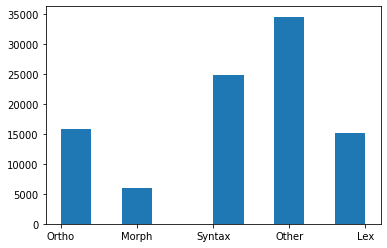

In [119]:
c = dict(Counter(major_tags))
for i in c:
    c[i] = round(c[i] / len(major_tags), 4)
pprint(c)
plt.hist(major_tags);

In [120]:
syntax_tags = []
for tag in tags:
    for i in tag_major_types:
        if tag in i and tag_major_types[i] == 'Syntax':
            syntax_tags.append(tag)
            break

{'agrgender': 0.0604,
 'agrgerund': 0.0022,
 'agrnum': 0.0594,
 'agrpers': 0.0066,
 'argcase': 0.0011,
 'argstr': 0.0104,
 'asp': 0.0955,
 'aux': 0.015,
 'brev': 0.017,
 'com': 0.001,
 'conj': 0.0848,
 'genneg': 0.0025,
 'gov': 0.2389,
 'impers': 0.0071,
 'mode': 0.0074,
 'neg': 0.0082,
 'passive': 0.0052,
 'ref': 0.0791,
 'refl': 0.0178,
 'syntax': 0.1819,
 'tense': 0.0273,
 'wo': 0.0712}
Тэгов с потенциальными ошибками в дереве: 6316, это 0.066 от всего корпуса


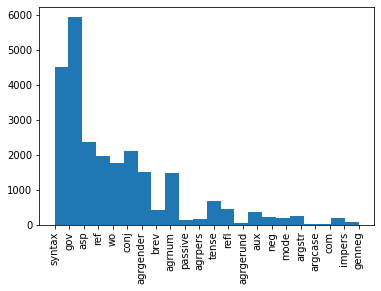

In [138]:
c = dict(Counter(syntax_tags))
for i in c:
    c[i] = round(c[i] / len(syntax_tags), 4)
pprint(c)
tree_mistake_tags = round((c['passive'] + c['argstr'] + c['gov']) * len(syntax_tags))
print(f"Тэгов с потенциальными ошибками в дереве: {tree_mistake_tags}, это {round(tree_mistake_tags / len(tags), 3)} от всего корпуса")
plt.xticks(rotation='vertical')
plt.hist(syntax_tags, bins=22);